In [65]:
# ~ 最初に唱えるおまじない ~ 
#  packagesのimport

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

% matplotlib inline

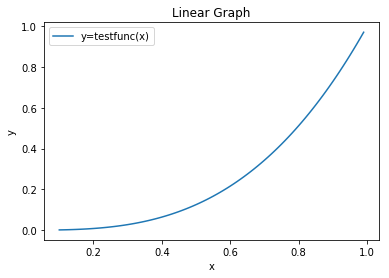

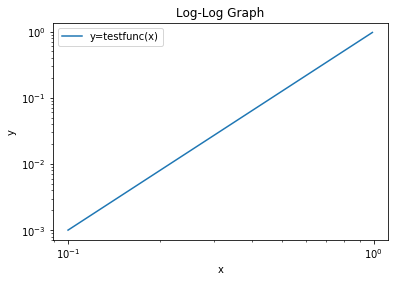

In [66]:
#テスト関数　:指数関数と対数グラフの理解のため(シミュレーションに直接関係なし)
def testfunc(x):
    '''
    testfunc(x)
    xの(指数)関数
    '''
    y=x**3    #指数部分を色々変えてみる! 例えばx**4やx**(-1)
    return y
    

def test():
    x=np.arange(0.1,1,0.01)
    y=testfunc(x)
    plt.plot(x,y,label="y=testfunc(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Graph")
    plt.legend()
    plt.show()
    
    
    
    plt.plot(x,y,label="y=testfunc(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Log-Log Graph")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()
    
test()

In [67]:
# 色々計算してくれる関数達
# 講義で学んだ内容と比較してみよう！

def calc(nw,m,func): 
    '''
    calc(nw,m,func)
    ネットワークnwにm本のlinkを持つnodeを1個追加する関数
    
    parameters
    --------
    nw : list
      隣接リスト:[(node1に繋がっているnodeからなるlist), (node2に繋がっているnodeからなるlist),...]
    m : int
      新たに追加されるnodeが持っているedgeの個数
    func : function
      毎回のnode追加時に, linkの接続先nodeを決める確率の関数を定義する
    '''
    
    N=len(nw) # node数
    degrees = np.array([len(n) for n in nw]) # 各nodeの次数
    
    #各nodeに対するlinkする確率の, array(listのようなもの)を作成
    if isinstance(func(degrees),float) or isinstance(func(degrees),int):
        plist = np.ones(np.size(degrees))*func(degrees)
    else:
        plist = func(degrees)
    plist = plist/plist.sum()
    
    #linkを追加するnodeのindex番号を決める
    index=choice(range(0,N),m,replace=False,p=plist)
    
    #ネットワークに新しいnodeを1個追加する
    for i in index:
        nw[i].append(N)
    nw.append(sorted(list(index)))
    
def dist(nw,m): 
    '''
    dist(nw,m)
    ネットワーク配列nwから次数分布の配列を作る関数
        
    parameter
    --------
    nw : list
      隣接リスト:[(node1に繋がっているnodeからなるlist), (node2に繋がっているnodeからなるlist),...]
    m : int
      新たに追加されるnodeが持っているedgeの個数
    '''
    degrees = [len(n) for n in nw] # 各nodeの次数
    
    x = np.arange(min(degrees),max(degrees)+1,dtype=np.int64) # x軸：次数
    y = np.array([degrees.count(degree) for degree in x]) # y軸：頻度
    y=y/y.sum() # 規格化

    y2=theofunc(m,x)
    
    np.savetxt("x.dat",x) # x.npyには次数の列が入っている
    np.savetxt("y.dat",y) # y.npyには数値シミュレーションした各次数の頻度が入っている
    np.savetxt("y2.dat",y2) # y2.npyには理論値の各次数の頻度が入っている

def comgra(m): #
    '''
    comgra(m)
    次数mの完全グラフを作る関数
    
    parameter
    --------
    m : int
      完全グラフの次数
    '''
    nw=[[j for j in range(m) if i != j ] for i in range(m)]
    return nw

In [68]:
# 理論値：自分で計算した結果をプログラムにしてみよう！
# 講義で扱ったモデル(BAモデル)の場合のみに対応しています.
def theofunc(m,x):
    '''
    theofunc(m,x)
    次数分布の理論値
    
    parameters
    --------
    m : int 
      新たに付け加わるnodeが持つ枝の本数
    x : int or real
      次数
    '''
    func=2.*m*(m+1)/(x*(x+1)*(x+2))   # <======== 手で計算した理論値の関数を入れてみよう！
    return func

In [69]:
%%time

#########################################
#シミュレーションの設定(次数mの完全グラフを初期状態にとる)
#########################################

# パラメータ　： ここを変えてみて結果がどう変わるか見てみよう！
m=4 # 追加するnodeの持つlinkの本数 
Nmax=1000 # 追加するnodeの個数

#毎回のnode追加時に, linkの接続先nodeを決める確率の関数を定義する
#分子の値だけを書いておけばok!
def q(k):
    q = k      #接続先の次数kに比例する場合 講義で扱ったモデル(BAモデル)の場合はこれ
    #q = 1   #接続先の次数kに依らず一様確率で接続する場合はこれ
    #q = ??     #自分で関数形を決めてみよう！
    return q


######################
#ネットワークを生成し, 成長させる
######################
# 初期状態を生成する
# node数mの完全グラフを作成
nw=comgra(m)

# Nmax回m本の枝を持つnodeを追加する
for j in range(0,Nmax):
    # 関数calcでネットワークnwにnodeを追加していく
    calc(nw,m,q)

np.save('nwdata.npy',nw)

############
#分布を計算する
############
dist(nw,m)
# x.npyには次数の列が入っている
# y.npyには数値シミュレーションした各次数の頻度が入っている
# y2.npyには理論値の各次数の頻度が入っている

CPU times: user 299 ms, sys: 4.26 ms, total: 303 ms
Wall time: 310 ms


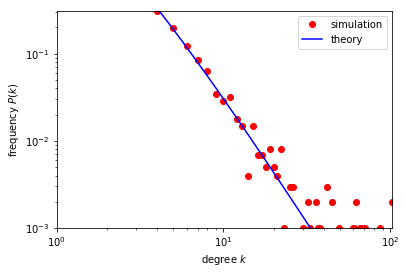

In [70]:
####################
#べき分布をplotしてみよう！
####################

# シミュレーション結果
x= np.loadtxt("x.dat")# x.npyには次数の列が入っている
y= np.loadtxt("y.dat")# y.npyには数値シミュレーションした各次数の頻度が入っている

plt.plot(x,y,"ro",label="simulation") # シミュレーション結果のplot 

# 理論値 (表示したくない場合は行頭に#を付ければ無視されます...´･_･`)
y2=np.loadtxt("y2.dat")# y2.npyには理論値の各次数の頻度が入っている
plt.plot(x,y2,"b-",label="theory")

# 表示に関するオプション
plt.xlabel(r"degree $k$")
plt.ylabel(r"frequency $P(k)$")
plt.xlim([1,x[y>0].max()]) # x軸の表示範囲 (1から最大次数まで)
plt.ylim([1/Nmax,y.max()]) # y軸の表示範囲
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show() # 表示！！
#plt.savefig("degree_dist.png")
#plt.clf()

In [71]:
############################################################
#上のcellの出力のグラフが直線でない場合, 次数分布P(k)がべき分布でないことが原因と考えられる.
#次数分布P(k)が他の形の場合にも, 見やすくなる形でグラフをplotしてみよう！
############################################################
from src_elcas.src0h import * #これはおまじないです.

# シミュレーション結果
x= np.loadtxt("x.dat")
y= np.loadtxt("y.dat")

#グラフのプロット
graph_style="normal"     # 通常のグラフです.
#graph_style="ylog"     # y軸がlogとなる片対数グラフです.
#graph_style="xlog-ylog"     #両軸がlog となる両対数グラフです.
#graph_style="xlog-yloglog"     #x軸はlog, y軸はY=log(-(log(y)))です.
#plot_simulated_data(x,y,graph_style)

Computed results are below:
  gamma = 2.95579113701
  y-segment = 1.54481747809


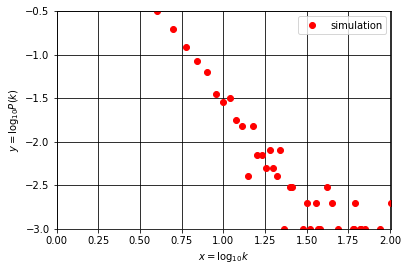

In [72]:
####################################################################
#gammaを求めてみよう！
#このcellでは以下のことが可能です
#(1) 数値計算によって得られたγ(ガンマ)などの値を出力します
#(2) 入力したγとy-切片の値を, グラフに上から描画し, シミュレーション結果とフィッテイング直線との一致を確かめることができます.
#注意: 次数分布P(k)がべき分布と異なる場合, まともな挙動をしません.
####################################################################
from src_elcas.src1i import * #これはおまじないです.

gamma=0
segment=0
plot_graph(gamma,segment,Nmax,show_estimation_line=False) #求めた傾きと切片からなる直線をグラフに出力しない場合はFalse, する場合はTrue.